In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10 #10
page_size = 100 #100

reviews = []
aircraft = []
seat_type = []
route = []
recommended = []
df = pd.DataFrame()

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    rating = []
    category = []

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

     # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    for para2 in parsed_content.find_all("div", {"class" : "review-stats"}):
        for para3 in para2.find_all('td',{'class' : 'review-value'}):
            rating.append(para3.get_text())
        recomend = rating[-1]
        rating = rating[:-1]

        for para4 in para2.find_all('td',{'class' : 'review-rating-stars stars'}):
            para5 = len(para4.find_all('span', {'class' : 'star fill'}))
            rating.append(para5)
        rating.append(recomend)
        #print(rating)

        for para6 in para2.find_all('td',{'class' : 'review-rating-header'}):
            category.append(para6.get_text())

        #print(category)
        # Create the records from both list, using zip and dict calls.

        # Build the dataframe from the dictionary.
        data_dict = pd.DataFrame([rating], columns=category)
        df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
        #print(df)
        rating = []
        category = []

    print(f"   ---> {len(reviews)} total reviews")

df["reviews"] = reviews

In [ ]:
df.shape

(1000, 14)

In [ ]:
df.size

14000

In [ ]:
df.sample(5)

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews
532,A320,Solo Leisure,Economy Class,Istanbul to London,January 2020,2.0,2.0,NaN,NaN,1.0,NaN,1,no,✅ Trip Verified | Istanbul to London. We had ...
583,A320,Couple Leisure,Business Class,Gatwick to Venice,September 2019,4.0,5.0,4.0,NaN,5.0,NaN,4,yes,Not Verified | Gatwick to Venice. We have flo...
993,NaN,Solo Leisure,Economy Class,London to Dublin,August 2018,5.0,5.0,2.0,NaN,4.0,NaN,3,yes,✅ Trip Verified | London to Dublin. This was ...
921,NaN,Business,Business Class,London to Dubai,November 2018,4.0,5.0,4.0,1.0,4.0,1.0,1,no,✅ Trip Verified | Having booked BA Business C...
937,Boeing 777,Business,Business Class,Gatwick to Orlando,October 2018,1.0,2.0,3.0,1.0,2.0,1.0,1,no,✅ Trip Verified | Gatwick to Orlando. Stains ...


In [ ]:
df.to_csv("BA_reviews.csv", index=False)

In [ ]:
#DATA CLEANING

In [ ]:
remove_text = ['✅ Trip Verified', 'Not Verified |']

for i in range(len(df['reviews'])):
    for j in remove_text:
        if j in df['reviews'][i]:
            df['reviews'] = df['reviews'].str.replace(j,'')

In [ ]:
df.sample(5)

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews
744,NaN,Family Leisure,Economy Class,Gatwick to Madrid,May 2019,2.0,2.0,NaN,NaN,1.0,NaN,1,no,| Gatwick to Madrid. When I arrived I waited...
516,Boeing 747-400,Family Leisure,Economy Class,New York to London Heathrow,January 2020,4.0,5.0,3.0,4.0,5.0,NaN,4,yes,"| New York to London Heathrow. Very good, st..."
118,NaN,Couple Leisure,Economy Class,Johannesburg to Los Angeles via London,January 2023,2.0,2.0,2.0,NaN,1.0,NaN,2,no,| It seems that there is a race to the bottom ...
425,NaN,Couple Leisure,Economy Class,Bridgetown to London,February 2021,1.0,1.0,1.0,NaN,1.0,NaN,1,no,| Absolutely appalling experience. British Ai...
866,A380,Solo Leisure,Premium Economy,Miami to London,January 2019,3.0,4.0,1.0,3.0,3.0,3.0,3,no,| Miami to London. The breakfast served just...


In [ ]:
#DATA ANALYSIS

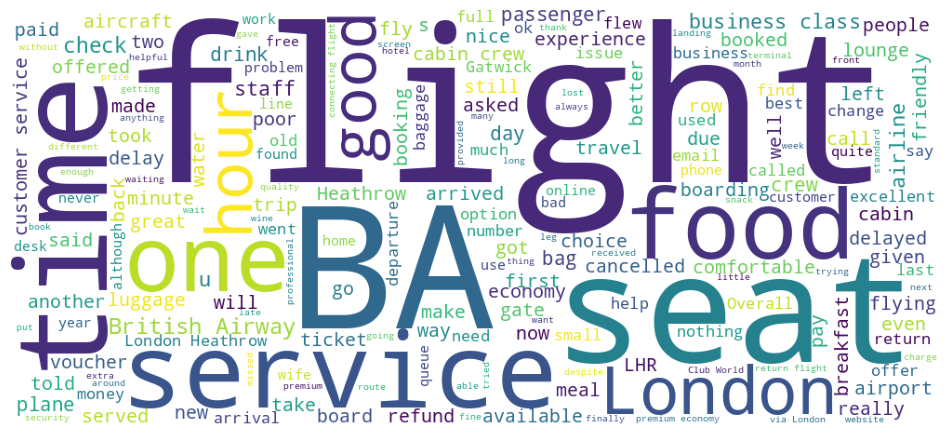

In [ ]:
review_word = []

for i in df['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)

unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
#From the wordcloud above, we can see the key of topics in customer review are flight, seat , service and time, showing that people are actively talking about their experience on the plane and the staff.

In [ ]:
#CUSTOMER SATISFACTION

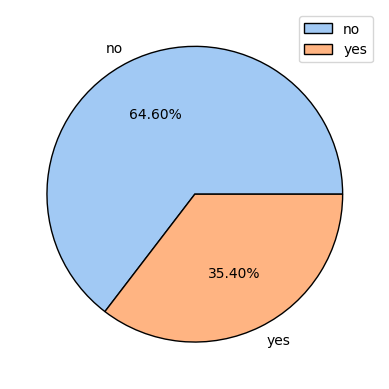

In [ ]:
soc = df.groupby('Recommended')['reviews'].count().reset_index()
plt.pie(soc['reviews'], labels = soc['Recommended'], autopct='%.2f%%',colors = sns.color_palette('pastel'),
          wedgeprops={"edgecolor":"k"},)
plt.legend()
plt.show()

In [ ]:
#From the pie chart above, we know that 63.3% of passengers are dissatisfied with British Airways services.

In [ ]:
# Rating of BA service by passengers that are dissatisfied with British Airways.

In [ ]:
df_soc = df[df['Recommended'] == 'no']
df_soc.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money
count,569.000000,563.000000,471.000000,329.000000,594.000000,167.000000,646.000000
mean,2.117750,2.428064,1.881104,2.133739,1.920875,1.508982,1.583591
std,1.096658,1.319061,1.059247,1.227375,1.214917,0.999206,0.863548
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
# FOOD ANALYSIS

In [ ]:
data = df_soc[df_soc['reviews'].str.contains('food | drink')]
data['reviews'].to_csv('test.csv')

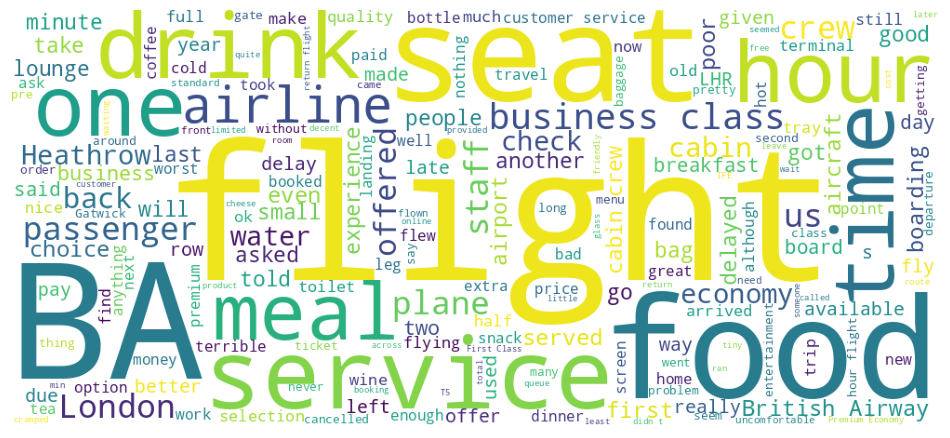

In [ ]:
review_word = []

for i in data['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)

unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
# VALUE (OF MONEY) ANALYSIS

In [ ]:
data = df_soc[df_soc['reviews'].str.contains('money | refund & value')]
data['reviews'].to_csv('test2.csv')

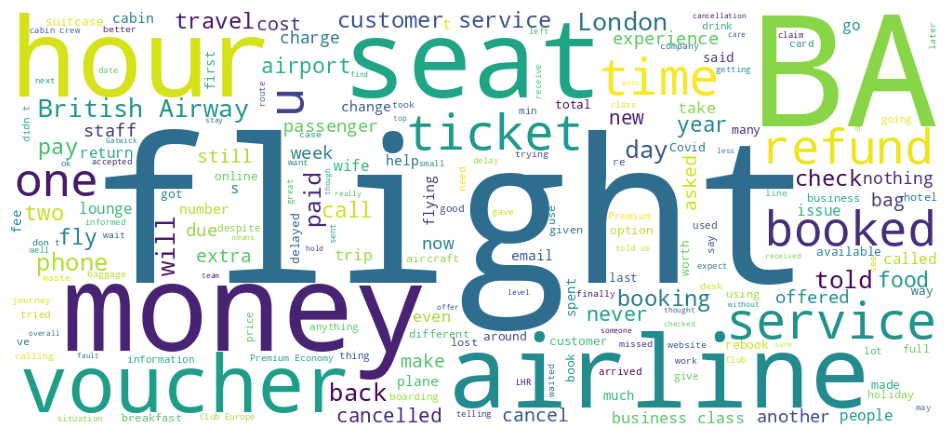

In [ ]:
review_word = []

for i in data['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)

unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.show()